# Artificial Intelligence / CNN - Decompossed
## Convolution via Python

### a. raw image

![raw](./imgs/green_911_turbo_86.jpeg)

### b. gather metadata - height, width, channel count

In [2]:
image_file = './imgs/green_911_turbo_86.jpeg'
[height, width ,red, green, blue] = image_meta(image_file)
channel_size = height*width

print('image height  : ', height)
print('image width   : ', width)
print('chanel size   : ', channel_size)
print('total pixels  : ', channel_size * 3) # 3 channels

image height  :  600
image width   :  800
chanel size   :  480000
total pixels  :  1440000


### d. green channel

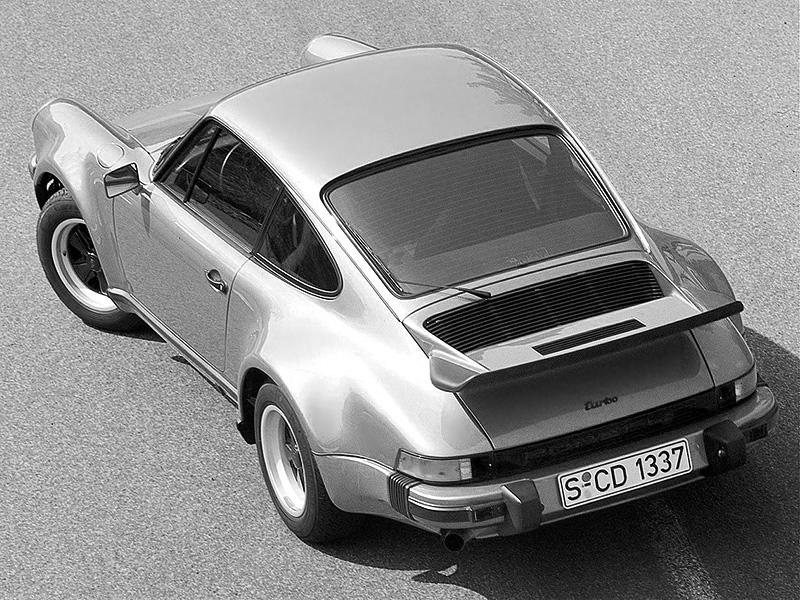

In [3]:
display_channel(green, width)

### e. convolution = a very overloaded term
basically, applying a kernel matrix to a larger matrix to create feature map, aka convolution  

![edge](./imgs/convolution_edge_detect.png)

http://timdettmers.com/2015/03/26/convolution-deep-learning/

![animated](./imgs/animated_convolution.gif)

http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html

### f. python convolution - simple pooling example

below added to http://localhost:8888/edit/AI_Decomposed.py

In [4]:
def PY_apply_simple_kernel_func(mat, w, kernel_funct):
    
    # determine height
    h=(int)(len(mat)/w)
    
    # list for convolution
    new_image = list()
    
    # slide window over matrix
    for i,g in enumerate(mat):
    
        # out of bounds?
        if i >= (w*(h-1)): 
            break
        if i!= 0 and (i+1) % w == 0:
            continue
        
        # grab window of pixels
        window = [mat[i], mat[(i+1)], mat[(i+w)], mat[(i+1+w)]]
        
        # apply function
        output = kernel_funct(window)
        
        # round half to even
        output = int(round(output))
        
        # add pixel to convolution
        new_image.append(output)
    return new_image

#### recursify the simple pooling function

below added to http://localhost:8888/edit/AI_Decomposed.py

In [5]:
# recursify the function
def PY_recurse_pooling(mat, width, kernel_funct, recurse_cnt):
    m = mat
    w = width
    for i in range(recurse_cnt):    
        m = PY_apply_simple_kernel_func(m, w, kernel_funct)
        w = w - 1
    return m

#### max pooling example

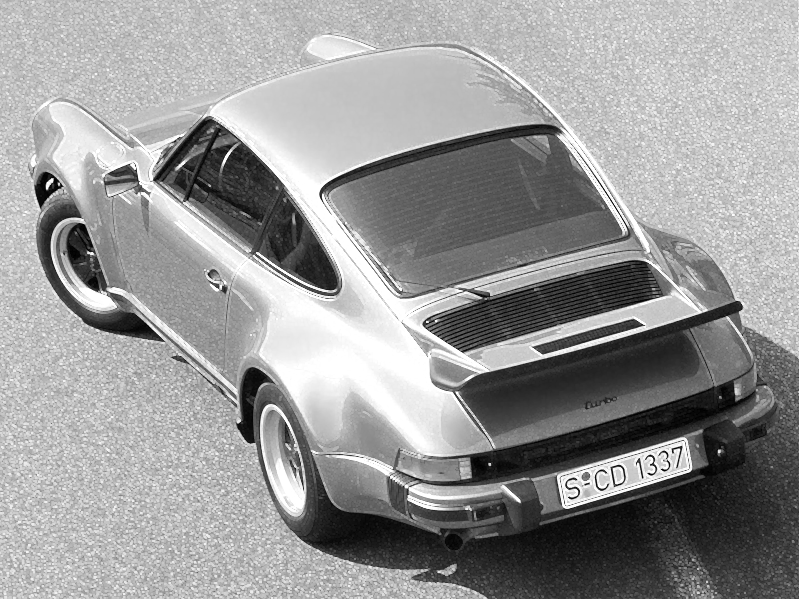

In [6]:
recurse_cnt = 1

green_pooled = PY_recurse_pooling(green, width, max, recurse_cnt)

display_channel(green_pooled, width - recurse_cnt)

#### mean pooling , reduction by 10,  example

In [8]:
import numpy as np
recurse_cnt = 10

convolution = PY_recurse_pooling(green, width, np.mean, recurse_cnt)

466100

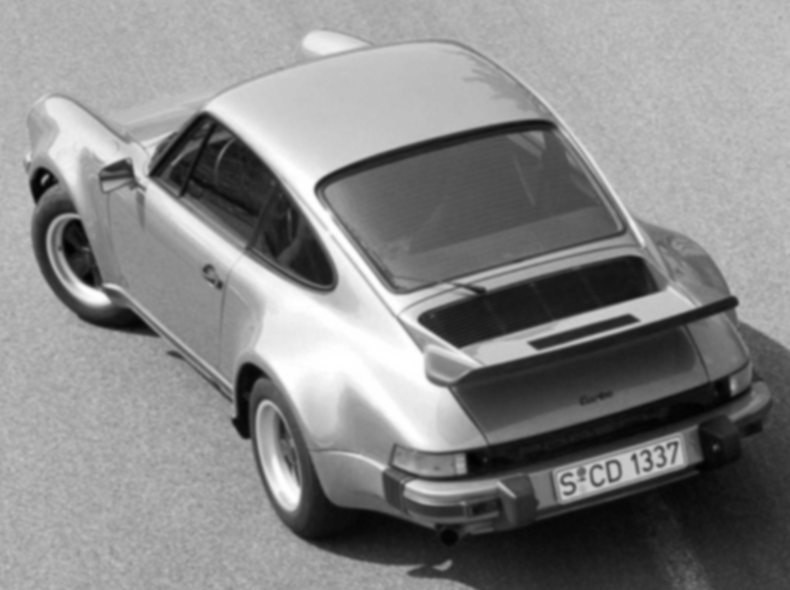

In [9]:
display(len(convolution))
display_channel(convolution, width - recurse_cnt)